In [207]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")
from IPython.core.display import display, HTML
import pylab
import numpy as np
import math
np.set_printoptions( suppress=True)
pd.set_option('display.float_format', lambda x:'%.0f' % x)
from __future__ import division

## Exploratory Data Analysis

In [208]:
path='/Users/mazen/Downloads/data/'
votes = pd.read_csv(path + 'votes.csv' )
cats = pd.read_csv(path + 'categories.csv', sep = ';')

In [209]:
votes.head()

,vote,user_id,question_type,answer,game_id,question_id
0,-1,1672454350,0,1,587704600,4014
1,1,367336,0,0,963908077,21691
2,1,3349874,0,0,1040820373,26250
3,-1,60753526,0,0,1299630681,10394
4,-1,660004992,0,2,2028311748,5766


In [210]:
cats.head()

,question_id,category_id
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [211]:
print votes.shape
print cats.shape

(1065558, 6)
(41285, 2)


In [212]:
votes.describe()

,vote,user_id,question_type,answer,game_id,question_id
count,1065419,1065532,1065419,1065428,1065445,1065419
mean,0,411556381,0,1,1324237670,24387093
std,1,641163640,0,1,475311474,184874067
min,-1,12,0,0,500002462,1
25%,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan
max,1,2147454874,1,9,2147475782,2141220564


In [213]:
#26 records have Null in all columns except column game_id.
votes[votes.user_id.isnull()].count()

vote              0
user_id           0
question_type     0
answer            0
game_id          26
question_id       0
dtype: int64

In [214]:
#113 records have Null in all columns except column user_id.
votes[votes.game_id.isnull()].count()

vote               0
user_id          113
question_type      0
answer             9
game_id            0
question_id        0
dtype: int64

In [215]:
#9 records have Null in all columns except column user_id & answer
votes[votes.game_id.isnull() & votes.answer.notnull() & votes.user_id.notnull() ].count()

vote             0
user_id          9
question_type    0
answer           9
game_id          0
question_id      0
dtype: int64

In [216]:
#These 9 records are for just 3 users with ids (1606986600,2404830,1635285)
votes[votes.question_id.isnull() & votes.answer.notnull() & votes.user_id.notnull()]

,vote,user_id,question_type,answer,game_id,question_id
718872,nan,1606986600,nan,0,nan,nan
722661,nan,1606986600,nan,0,nan,nan
724645,nan,1606986600,nan,2,nan,nan
1007422,nan,2404830,nan,0,nan,nan
1007701,nan,2404830,nan,0,nan,nan
1011639,nan,2404830,nan,0,nan,nan
1024378,nan,1635285,nan,0,nan,nan
1025670,nan,1635285,nan,1,nan,nan
1026855,nan,1635285,nan,1,nan,nan


In [217]:
#Remove the 139 (113 + 26) problamtic columns
votes = votes[votes.user_id.notnull() & votes.game_id.notnull() ]
votes.describe()

,vote,user_id,question_type,answer,game_id,question_id
count,1065419,1065419,1065419,1065419,1065419,1065419
mean,0,411553438,0,1,1324235413,24387093
std,1,641165888,0,1,475311882,184874067
min,-1,12,0,0,500002462,1
25%,-1,1875859,0,0,912391980,9374
50%,1,2911686,0,0,1324291740,20818
75%,1,751012995,0,2,1736121315,32383
max,1,2147454874,1,9,2147475782,2141220564


In [218]:
#Count of unique question_ids that are in votes.csv and are not in categories.csv
len(set(votes.question_id.unique()) - set(cats.question_id.unique()))

238

In [219]:
#Count of unique question_ids that are in categories.csv and are not in votes.csv
len(set(cats.question_id.unique()) - set(votes.question_id.unique()) )

1055

In [220]:
#Joining the two data frames using left join on question_id
df = votes.merge(cats, left_on='question_id', right_on='question_id', how='left')

In [221]:
#There are 86 users who got the same question more than once.
len(df[df.duplicated(['user_id', 'question_id' ])].user_id.unique())

86

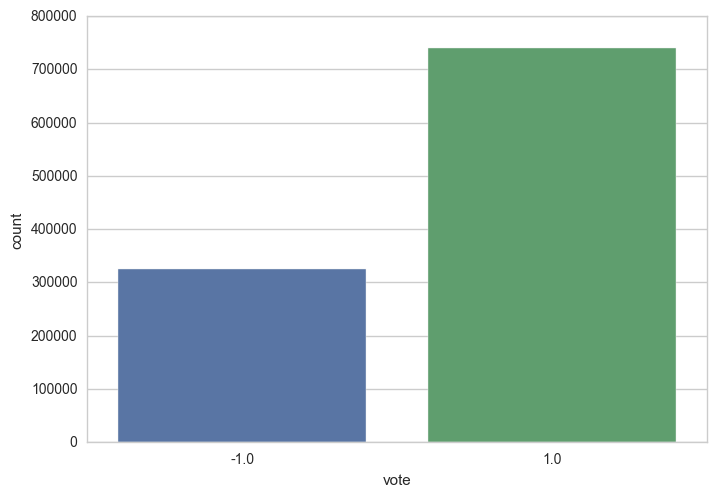

In [222]:
#Most of the user ratings in the data frame are thumbs up 
sns.countplot(x='vote',data=df )

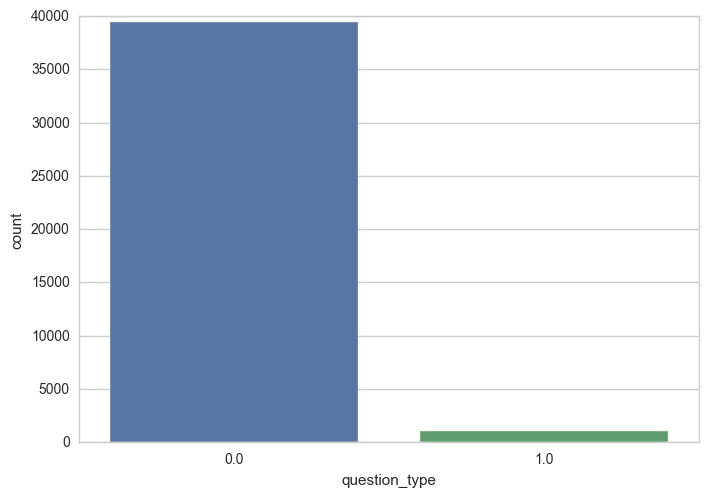

In [201]:
#The vast majority of the questions are text-based and not image. 
sns.countplot(x='question_type',data=df.drop_duplicates('question_id'))

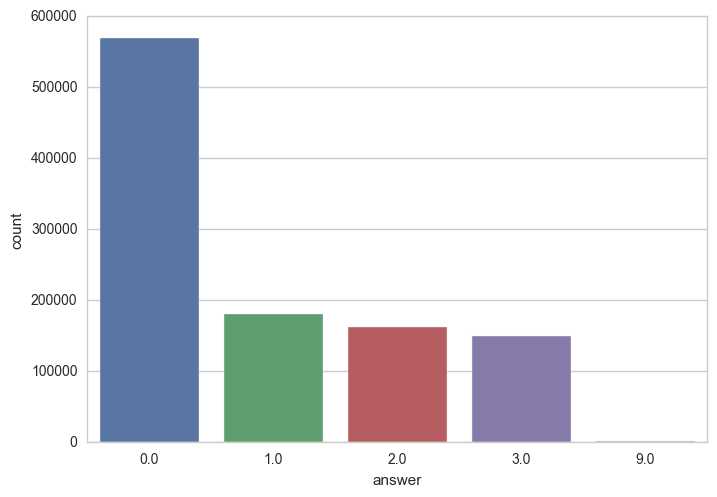

In [202]:
#The three incorrect answers (encoded in 1, 2 & 3) are equiprobable. Moreover we can see that the ‘other’ option (encoded in 9) is a rare event.
sns.countplot(x='answer',data=df)

In [ ]:
#we create another feature/column in the dataframe called answer_type which has just 3 values, 
#correct (for answer 0), incorrect (for answer 1, 2 & 3) or other (for answer 9)
def get_answer_type(x):
    if x == 0: 
        return 'correct'
    elif x == 9:
        return 'other' 
    else: 
        return 'incorrect'
df['answer_type']= df.answer.apply(get_answer_type)

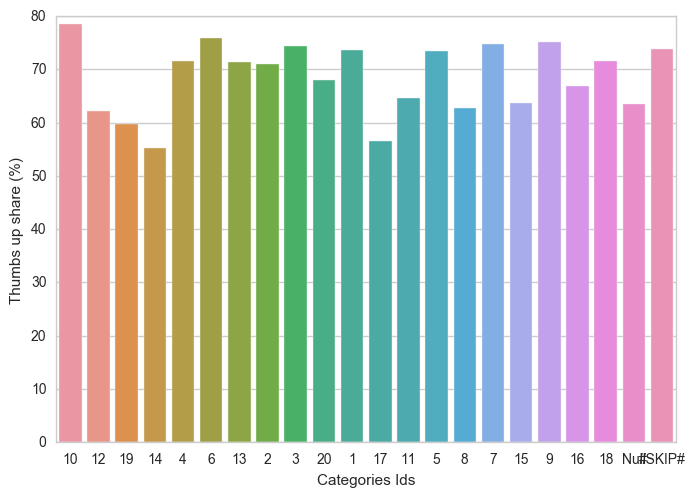

In [184]:
#Calculating the shares of thumbs up for every category id
catgeories = []
likes_share = []
for category in df[df.category_id.notnull()].category_id.unique():
    catgeories.append(category)
    likes_count = df[(df.category_id == category) & (df.vote == 1)].vote.count()
    dislikes_count = df[(df.category_id == category) & (df.vote == -1)].vote.count()
    likes_share.append(likes_count*100/(likes_count+dislikes_count))
    
ax =sns.barplot(x=catgeories , y=likes_share )
ax.set(xlabel='Categories Ids', ylabel='Thumbs up share (%)')
plt.show()

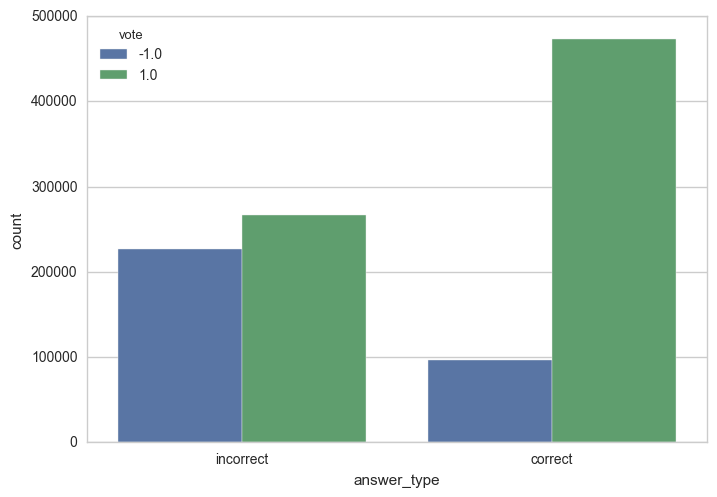

In [204]:
#We get more thumbs down for questions with incorrect answers compared to questions with correct answer.
sns.countplot(x='answer_type' , hue='vote'  ,data=df[df.answer_type != 'other'] )

## Chi Square test for independence 

In [205]:
import scipy.stats as stats
sampled_df = df.sample(n=100)
correct_dislike = sampled_df[(sampled_df.answer_type == 'correct') & (sampled_df.vote == -1)].vote.count()
correct_like = sampled_df[(sampled_df.answer_type == 'correct') & (sampled_df.vote == 1)].vote.count()
incorrect_dislike = sampled_df[(sampled_df.answer_type == 'incorrect') & (sampled_df.vote == -1)].vote.count()
incorrect_like = sampled_df[(sampled_df.answer_type == 'incorrect') & (sampled_df.vote == 1)].vote.count()
obs =  [[correct_dislike, correct_like ] ,[incorrect_dislike, incorrect_like ]]
print 'Observed contingency table: ' ,obs
chi2, p, dof, ex = stats.chi2_contingency(obs)
print 'Chi Square statistic', chi2
print 'p value: ', p
print 'Degrees of freedom: ', dof
print 'Expected contingency table: ' , ex 

Observed contingency table:  [[4, 59], [18, 19]]
Chi Square statistic 21.9024219024
p value:  2.86871642662e-06
Degrees of freedom:  1
Expected contingency table:  [[ 13.86  49.14]
 [  8.14  28.86]]


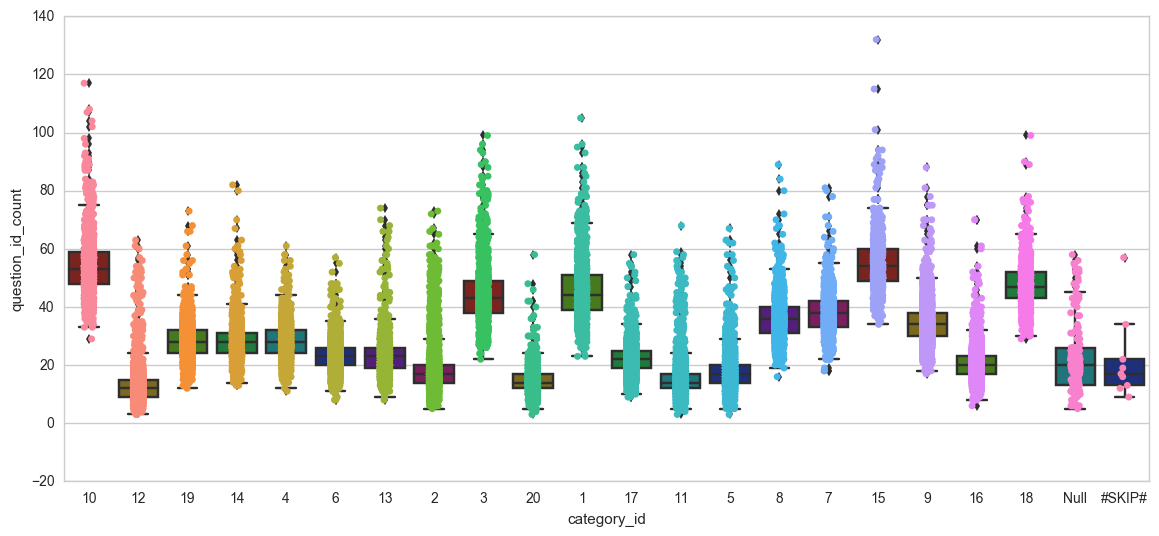

In [176]:
#Plotting boxplots along with stripplot shows that all the questions under some categories 10, 15 & 18 
#are shown more frequently than the other categories
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax= sns.boxplot(x='category_id', y='question_id_count', data=df.drop_duplicates('question_id'), palette =sns.hls_palette(8, l=.3, s=.8) )
ax = sns.stripplot(x='category_id', y='question_id_count', data=df.drop_duplicates('question_id'), jitter=True, edgecolor="gray")
pylab.show()

Mean question_count 26.3274439063
Median question_count 23.0


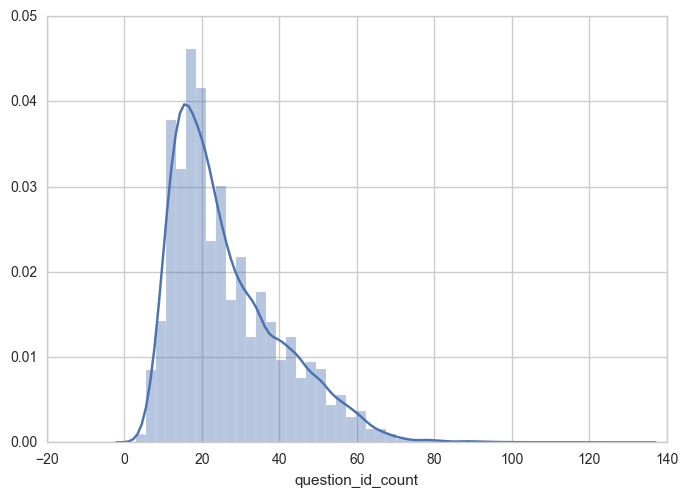

In [198]:
#we create one more column for the counts of question_id
question_id_count = df.question_id.value_counts()
df['question_id_count'] = df.question_id.apply(lambda x : question_id_count[x])
sns.distplot(df.drop_duplicates('question_id').question_id_count)
print 'Mean question_count' , df.drop_duplicates('question_id')['question_id_count'].mean()
print 'Median question_count' , df.drop_duplicates('question_id')['question_id_count'].median()